In [95]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests as req
from config import weather_api_key
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [96]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [97]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [98]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

51.41752486785069 -158.67084803083443
-52.40498392533223 -22.368238884860858
30.294386443982134 -87.31569560491303
-72.77271550533366 -82.18586474355884
-57.07795730188526 163.5096542258221
-15.300085043459248 17.247137879560796
-13.139012277845268 -127.96394543201225
43.66827760275416 -18.71668344995379
79.5291823290693 -91.0612092326651
-54.66114424372269 -38.961427429197045
-39.994815922634615 -132.3399113540857
2.6493410724603166 -83.97666919805272
69.32760042029196 167.5737392279765
68.60142685420396 147.1405618873161
72.59089128890764 166.96764675530898
-31.685168327668862 -112.77993552187671
60.02172350317295 177.13027715248046
55.55318617255469 -49.33305976384608
42.399357380454205 20.11659315760437
-58.748759183070845 32.70689138521311
-19.39605511535038 102.04411114709359
-88.51446868662435 -106.53912327240201
18.95275828058928 173.15727217007912
-2.226112219222088 30.763327534343915
32.24565131680444 4.225691921085257
31.18279016745825 -77.30286125471073
-43.60008086138907 -

In [99]:
#from citipy import citipy

In [100]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kodiak us
arraial do cabo br
warrington us
punta arenas cl
bluff nz
menongue ao
atuona pf
vila franca do campo pt
qaanaaq gl
mar del plata ar
rikitea pf
muisne ec
bilibino ru
belaya gora ru
pevek ru
rikitea pf
beringovskiy ru
qaqortoq gl
bajram curri al
port alfred za
carnarvon au
punta arenas cl
butaritari ki
kibungo rw
warqla dz
georgetown us
vaini to
ostrovnoy ru
leh in
safaga eg
longyearbyen sj
kidal ml
ushuaia ar
mount isa au
port alfred za
tuktoyaktuk ca
wad madani sd
leningradskiy ru
new norfolk au
punta arenas cl
severo-kurilsk ru
toma bf
lagoa pt
bredasdorp za
hamilton bm
astoria us
jiddah sa
atuona pf
cobija bo
provideniya ru
saint-philippe re
avarua ck
torbay ca
albany au
khonuu ru
sergeyevka kz
ushuaia ar
tasiilaq gl
key largo us
punta arenas cl
itaituba br
ribeira grande pt
puerto ayora ec
sur om
hermanus za
sao filipe cv
seoul kr
rikitea pf
ilhabela br
saint andrews ca
baiyin cn
beeville us
mataura pf
lagos pt
bluff nz
loandjili cg
paso de los toros uy
punta arenas cl
kay

ushuaia ar
thompson ca
hasaki jp
dikson ru
verkh-usugli ru
alice springs au
chyhyryn ua
jamestown sh
barrow us
saint-philippe re
tuzamapan mx
erenhot cn
chandauli in
vaitupu wf
bluff nz
majene id
east london za
saint george bm
cherskiy ru
sisimiut gl
constitucion mx
nome us
karratha au
saleaula ws
ushuaia ar
busselton au
punta arenas cl
uyuni bo
atuona pf
phuthaditjhaba za
kaitangata nz
fuerte olimpo py
barrow us
ancud cl
vila franca do campo pt
cabo san lucas mx
rikitea pf
port alfred za
rikitea pf
soto la marina mx
rocha uy
harper lr
jamestown sh
tuatapere nz
port alfred za
dakar sn
bredasdorp za
zaragoza es
lindi tz
mataura pf
tiksi ru
tiksi ru
te anau nz
ust-kan ru
nago jp
longyearbyen sj
thai binh vn
hobart au
nanchang cn
ushuaia ar
troitsko-pechorsk ru
atambua id
vaini to
busselton au
sakakah sa
illoqqortoormiut gl
lebu cl
dubbo au
mataura pf
cherskiy ru
fier al
tuatapere nz
cherskiy ru
punta arenas cl
rio claro tt
urengoy ru
tasiilaq gl
cidreira br
lehre de
isiro cd
belushya gub

In [101]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [102]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [103]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f25774bd556f0521f4f72407eb1872d8


In [104]:
# Import the time library and the datetime module from the datetime library 
#import time
#from datetime import datetime




In [105]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | warrington
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | menongue
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | vila franca do campo
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | muisne
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | belaya gora
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | beringovskiy
Processing Record 17 of Set 1 | qaqortoq
Processing Record 18 of Set 1 | bajram curri
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | kibungo
Processing Reco

Processing Record 40 of Set 4 | bac lieu
Processing Record 41 of Set 4 | yellowknife
Processing Record 42 of Set 4 | castro
Processing Record 43 of Set 4 | mau
Processing Record 44 of Set 4 | sinnamary
Processing Record 45 of Set 4 | gympie
Processing Record 46 of Set 4 | karaul
City not found. Skipping...
Processing Record 47 of Set 4 | nikolskoye
Processing Record 48 of Set 4 | ocala
Processing Record 49 of Set 4 | asau
Processing Record 50 of Set 4 | grindavik
Processing Record 1 of Set 5 | dingle
Processing Record 2 of Set 5 | victoria
Processing Record 3 of Set 5 | nizwa
Processing Record 4 of Set 5 | bengkulu
Processing Record 5 of Set 5 | esperance
Processing Record 6 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 5 | luanda
Processing Record 8 of Set 5 | cayenne
Processing Record 9 of Set 5 | arenapolis
Processing Record 10 of Set 5 | la roda
Processing Record 11 of Set 5 | cape town
Processing Record 12 of Set 5 | oranjemund
Processing Recor

Processing Record 29 of Set 8 | ust-kan
Processing Record 30 of Set 8 | nago
Processing Record 31 of Set 8 | thai binh
Processing Record 32 of Set 8 | nanchang
Processing Record 33 of Set 8 | troitsko-pechorsk
Processing Record 34 of Set 8 | atambua
Processing Record 35 of Set 8 | sakakah
Processing Record 36 of Set 8 | dubbo
Processing Record 37 of Set 8 | fier
Processing Record 38 of Set 8 | rio claro
Processing Record 39 of Set 8 | urengoy
Processing Record 40 of Set 8 | lehre
Processing Record 41 of Set 8 | isiro
Processing Record 42 of Set 8 | kualakapuas
Processing Record 43 of Set 8 | zaria
Processing Record 44 of Set 8 | nuristan
Processing Record 45 of Set 8 | porto novo
Processing Record 46 of Set 8 | burgeo
Processing Record 47 of Set 8 | punta de piedra
Processing Record 48 of Set 8 | padang
Processing Record 49 of Set 8 | port elizabeth
Processing Record 50 of Set 8 | ugoofaaru
Processing Record 1 of Set 9 | whitehorse
Processing Record 2 of Set 9 | tamuin
Processing Recor

Processing Record 16 of Set 12 | dunedin
Processing Record 17 of Set 12 | jurm
Processing Record 18 of Set 12 | sao luiz gonzaga
Processing Record 19 of Set 12 | hailar
Processing Record 20 of Set 12 | teya
Processing Record 21 of Set 12 | beisfjord
Processing Record 22 of Set 12 | nishihara
Processing Record 23 of Set 12 | vredendal
Processing Record 24 of Set 12 | beira
Processing Record 25 of Set 12 | lasa
Processing Record 26 of Set 12 | faanui
Processing Record 27 of Set 12 | la gomera
Processing Record 28 of Set 12 | zhezkazgan
Processing Record 29 of Set 12 | okha
Processing Record 30 of Set 12 | luderitz
Processing Record 31 of Set 12 | san vicente
Processing Record 32 of Set 12 | sal rei
Processing Record 33 of Set 12 | le port
Processing Record 34 of Set 12 | dedza
Processing Record 35 of Set 12 | cranbrook
Processing Record 36 of Set 12 | udagamandalam
Processing Record 37 of Set 12 | havre
Processing Record 38 of Set 12 | penukonda
Processing Record 39 of Set 12 | dali
Proc

In [106]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,52.16,97,100,8.05,US,2022-08-10 19:59:52
1,Arraial Do Cabo,-22.9661,-42.0278,73.36,83,75,3.44,BR,2022-08-10 19:59:53
2,Warrington,53.3925,-2.5802,77.72,55,0,8.05,GB,2022-08-10 19:59:53
3,Punta Arenas,-53.1500,-70.9167,44.71,76,0,6.91,CL,2022-08-10 19:57:42
4,Bluff,-46.6000,168.3333,41.68,69,98,8.10,NZ,2022-08-10 19:59:54
5,Menongue,-14.6585,17.6910,59.20,22,0,4.03,AO,2022-08-10 19:59:55
6,Atuona,-9.8000,-139.0333,77.38,77,7,23.17,PF,2022-08-10 19:59:33
7,Vila Franca Do Campo,37.7167,-25.4333,72.01,70,63,7.14,PT,2022-08-10 19:59:56
8,Qaanaaq,77.4840,-69.3632,38.53,63,83,1.99,GL,2022-08-10 19:59:57
9,Mar Del Plata,-38.0023,-57.5575,57.94,56,40,12.66,AR,2022-08-10 19:57:06


In [107]:
# Reorder
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [108]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-08-10 19:59:52,57.7900,-152.4072,52.16,97,100,8.05
1,Arraial Do Cabo,BR,2022-08-10 19:59:53,-22.9661,-42.0278,73.36,83,75,3.44
2,Warrington,GB,2022-08-10 19:59:53,53.3925,-2.5802,77.72,55,0,8.05
3,Punta Arenas,CL,2022-08-10 19:57:42,-53.1500,-70.9167,44.71,76,0,6.91
4,Bluff,NZ,2022-08-10 19:59:54,-46.6000,168.3333,41.68,69,98,8.10
...,...,...,...,...,...,...,...,...,...
553,Senneterre,CA,2022-08-10 20:17:04,48.3835,-77.2328,73.81,63,95,6.64
554,Prince George,CA,2022-08-10 20:16:29,53.9166,-122.7530,83.25,38,0,3.00
555,Muli,MV,2022-08-10 20:18:07,2.9167,73.5667,81.14,80,89,6.98
556,Lincoln,US,2022-08-10 20:15:57,40.8000,-96.6670,95.97,45,0,5.75


In [111]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")#R

In [112]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

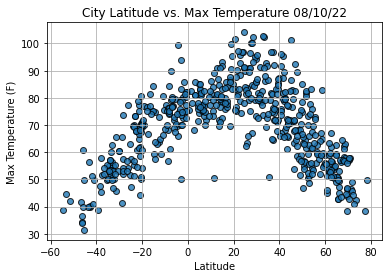

In [113]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

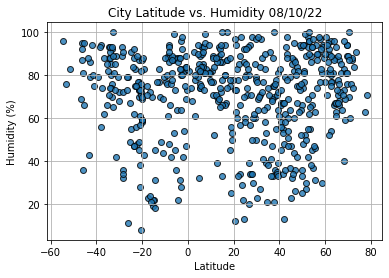

In [114]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

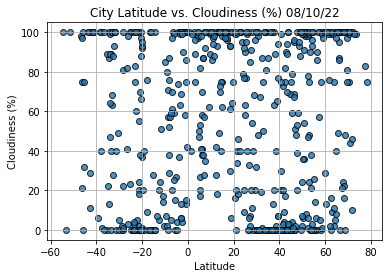

In [115]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

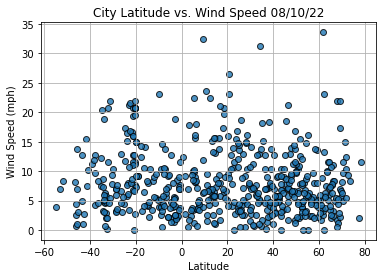

In [116]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()